In [1]:
!pip install keras

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
##Cpntrol GPU usage
import tensorflow as tf
import keras.backend.tensorflow_backend as ktf

def get_session(gpu_fraction=0.9):
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction,
                                allow_growth=True)
    return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


ktf.set_session(get_session())

# from tensorflow.keras.backend import set_session
#import tensorflow as tf
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
# config.log_device_placement = True  # to log device placement (on which device the operation ran)sess = tf.Session(config=config)set_session(sess)
# sess = tf.Session(config=config)
# set_session(sess) 

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam as Adam
from tensorflow.keras.models import load_model

In [3]:
#Use a base model of your choice. Remember to change the input size as per that. Check out keras.applications website
base_model= InceptionV3(include_top=False, weights='../inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5', input_shape=(299,299,3))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Dropout
model= Sequential()
model.add(base_model)
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))


In [11]:
base_model.summary()
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_v1[0][0]     
__________________________________________________________________________________________________
conv2d_1 (

In [7]:
from tensorflow.keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.2,  height_shift_range=0.2) 

In [8]:
train_data= train_generator.flow_from_directory(
                                                batch_size=256,directory="/raid/Data/Master_Dataset/elvin/final_mix/train/",
                                                shuffle=True,class_mode="binary",target_size=(299,299))

Found 948603 images belonging to 2 classes.


In [9]:
train_data.class_indices

{'fake': 0, 'real': 1}

In [10]:
test_generator=ImageDataGenerator(rescale = 1./255)

In [11]:
val_data= test_generator.flow_from_directory(
                                              directory="/raid/Data/Master_Dataset/elvin/final_mix/validation/",
                                              shuffle=True,batch_size=256,class_mode="binary",target_size=(299,299))

Found 518144 images belonging to 2 classes.


In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=.5, min_lr=0.0001)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
# # Save the model with best weights
# checkpointer = ModelCheckpoint('Xceptionbestweights1.hdf5', verbose=1,save_best_only=True)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [15]:
from tensorflow.keras.utils import multi_gpu_model

In [16]:
from matplotlib import pyplot
import sys

In [18]:
def summarize_diagnostics(history,epoch):
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')

    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')

    pyplot.subplots_adjust(top=0.92, bottom=0.2, left=0.0, right=2.5, hspace=0.25,
                    wspace=0.25)
    pyplot.show()    


    #     pyplot.subplot(213)
    # 	pyplot.title('Classification Accuracy')
    # 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename +'InceptionNewAdam'+str(epoch)+ '_plot.png')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/6
2024/2024 [==============================] - 2221s 1s/step - loss: 0.3579 - acc: 0.8978

Epoch 00001: val_acc improved from -inf to 0.89779, saving model to BestWeights_epoch6.hdf5
3706/3706 [==============================] - 20012s 5s/step - loss: 0.0387 - acc: 0.9856 - val_loss: 0.3579 - val_acc: 0.8978
Epoch 2/6
2024/2024 [==============================] - 2218s 1s/step - loss: 0.5214 - acc: 0.8852

Epoch 00002: val_acc did not improve from 0.89779
3706/3706 [==============================] - 19157s 5s/step - loss: 0.0342 - acc: 0.9872 - val_loss: 0.5214 - val_acc: 0.8852
Epoch 3/6
2024/2024 [==============================] - 2265s 1s/step - loss: 0.4502 - acc: 0.8858

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.000500000023748

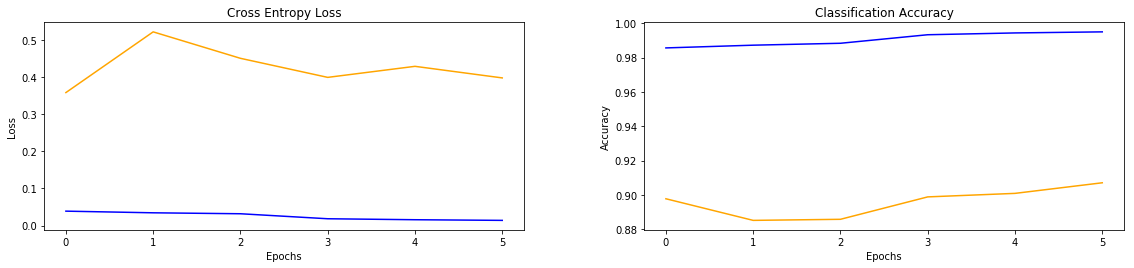

<Figure size 432x288 with 0 Axes>

In [19]:
from tensorflow.keras.utils import multi_gpu_model
y=6 ##no of epochs
try:
    location="BestWeights_epoch"+str(y)+ ".hdf5"
    checkpointer = ModelCheckpoint(location, monitor='val_acc', verbose=1, save_best_only=True, mode='max')    
    final_location=[]
    location=[]

    parallel_model = multi_gpu_model(model, gpus=2)
    parallel_model.compile(loss='binary_crossentropy',
                           optimizer=Adam(lr=0.001),metrics=["accuracy"])
#model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
    history_model=parallel_model.fit_generator(generator=train_data,
                            steps_per_epoch=train_data.samples//train_data.batch_size,
                            validation_data=val_data,
                            verbose=1,
                            validation_steps=val_data.samples//val_data.batch_size,
                            epochs=y,callbacks=[learning_rate_reduction,es,checkpointer])
    model.save("InceptionV3"+str(y)+".hdf5")
    
    summarize_diagnostics(history_model,y)
    loss=history_model.history['loss']
    acc=history_model.history['acc']
    valacc=history_model.history['val_acc']
    valloss=history_model.history['val_loss']
    location = [y,loss,acc,valacc, valloss]
    final_location.append(location)
    save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
    save1.to_csv('InceptionV3'+str(y)+'.csv')
except Exception as e: 
    print(e)
    continue

In [ ]:
##TESTING
#from tensorflow.keras.models import load_model
#weight_path='InceptionV36.hdf5'
#model=load_model(weight_path)

In [ ]:
#####CONFUSION MATRIX
import numpy as np
from tensorflow.keras.preprocessing import image
prediction=np.array([])
prob_prediction=np.array([])
#train_data.class_indices
import os
fake=os.listdir('/raid/Data/Master_Dataset/elvin/final_mix/test/fake/')
fake_actual=np.zeros(len(fake))
print(len(fake))
count=0
for name in fake:
    test_image = image.load_img('/raid/Data/Master_Dataset/elvin/final_mix/test/fake/'+name, target_size = (299, 299))
    test_image = image.img_to_array(test_image)
    test_image=test_image*(1./255)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #training_set.class_indices
    prob_prediction=np.append(prob_prediction,result[0][0])
    if result[0][0]>0.5:
        prediction=np.append(prediction,1)
        count+=1
    else:
        prediction=np.append(prediction,0)
        count+=1
    print(count)



In [ ]:
real=os.listdir('/raid/Data/Master_Dataset/elvin/final_mix/test/real/')
###REAL PART FOR CONFUSION MATRIX
real_actual=np.ones(len(real))
print(len(real))
count=0
for name in real:
    test_image = image.load_img('/raid/Data/Master_Dataset/elvin/final_mix/test/real/'+name, target_size = (299, 299))
    test_image = image.img_to_array(test_image)
    test_image=test_image*(1./255)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    #training_set.class_indices
    prob_prediction=np.append(prob_prediction,result[0][0])
    if result[0][0]>0.5:
        prediction=np.append(prediction,1)
        count+=1
    else:
        prediction=np.append(prediction,0)
        count+=1
        print(count)